<a href="https://colab.research.google.com/github/tibhar940/isswrapper/blob/develop/isswrapper_getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!git clone https://github.com/tibhar940/isswrapper.git --branch develop
!pip install isswrapper/.
!pip install -U matplotlib

fatal: destination path 'isswrapper' already exists and is not an empty directory.
Processing ./isswrapper
  Created wheel for isswrapper: filename=isswrapper-1.0.0-cp37-none-any.whl size=6574 sha256=d7adb6e42d75b0101e575f9a13645029d970a71723fe71bb63414770603e7e97
  Stored in directory: /tmp/pip-ephem-wheel-cache-jb8_32kn/wheels/bc/a9/38/f763b62249658ab0d11fa7ffd0b8eb5074d298c0ab13defc62
Successfully built isswrapper
  Found existing installation: isswrapper 1.0.0
    Uninstalling isswrapper-1.0.0:
      Successfully uninstalled isswrapper-1.0.0


     |████████████████████████████████| 10.3MB 6.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import isswrapper
print(isswrapper.__version__)

1.0.0


In [3]:
from isswrapper.loaders.securities import security_description

In [43]:
df = security_description(q="MOEX", lang="en")

In [44]:
df

,name,title,value,type,sort_order,is_hidden,precision
0,SECID,Security code,MOEX,string,1,0,<NA>
1,NAME,Full name,MoscowExchange,string,3,0,<NA>
2,SHORTNAME,Short name,MoscowExchange,string,4,0,<NA>
3,ISIN,ISIN Code,RU000A0JR4A1,string,5,0,<NA>
4,REGNUMBER,State registration number,1-05-08443-H,string,6,0,<NA>
5,ISSUESIZE,Issue Size,2276401458,number,7,0,0
6,FACEVALUE,Face value,1,number,8,0,2
7,FACEUNIT,Face value currency,SUR,string,9,0,<NA>
8,ISSUEDATE,Date of listing,2013-02-04,date,10,0,<NA>
9,LATNAME,Full name in English,MoscowExchange,string,11,1,<NA>


In [13]:
import datetime
from isswrapper.loaders.candles import candles

In [48]:
df = candles(
    engine="stock",
    market="shares",
    boardid="TQBR",
    securityid="MOEX",
    interval=24
)

In [49]:
df.shape

(500, 8)

In [50]:
df.head()

,open,close,high,low,value,volume,begin,end
0,48.07,48.43,48.65,47.42,8767126.7,181760.0,2013-04-04,2013-04-04 23:59:59
1,48.43,48.50,48.61,47.50,5964565.5,123940.0,2013-04-05,2013-04-05 23:59:59
2,48.67,47.52,48.88,47.50,5280065.5,110530.0,2013-04-08,2013-04-08 23:59:59
3,48.23,47.40,48.23,47.40,9993069.9,209980.0,2013-04-09,2013-04-09 23:59:59
4,48.00,46.87,48.00,46.75,20036515.1,424170.0,2013-04-10,2013-04-10 23:59:59


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   open    500 non-null    float64       
 1   close   500 non-null    float64       
 2   high    500 non-null    float64       
 3   low     500 non-null    float64       
 4   value   500 non-null    float64       
 5   volume  500 non-null    float64       
 6   begin   500 non-null    datetime64[ns]
 7   end     500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(6)
memory usage: 31.4 KB


In [52]:
import matplotlib.pyplot as plt

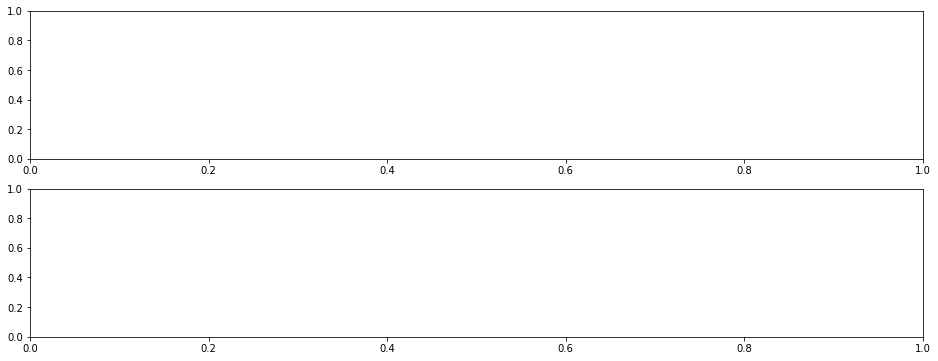

In [53]:
fig, axes = plt.subplot_mosaic(
    """
    AA
    BB
    """,
    figsize=[16, 6]
)

In [54]:
df.set_index("begin")["close"].plot(ax=axes["A"])
df.set_index("begin")["value"].plot(ax=axes["B"], color="red")

<AxesSubplot:label='B', xlabel='begin'>

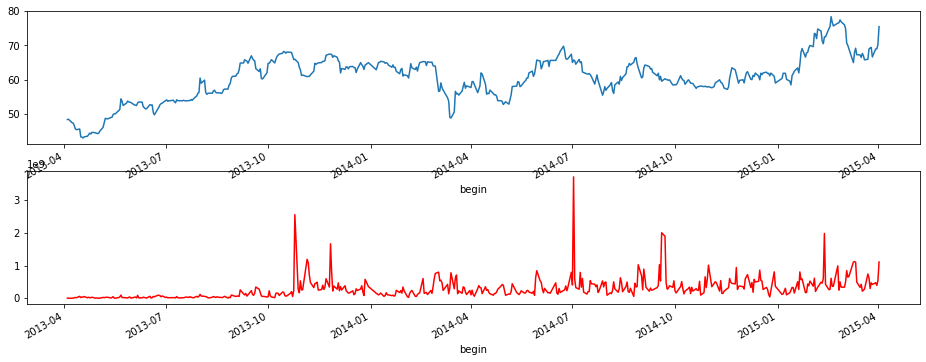

In [55]:
fig